In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy.random as ra 

In [18]:
dav_test = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries_nogiants.csv')
dav_test = dav_test[((dav_test['g'] - dav_test['i']) <= 0.75) & ((dav_test['g'] - dav_test['i']) >= 0.5)]
dav_test = dav_test[(dav_test['logAge'] <= 9)]
dav_test = dav_test[(dav_test['Mact'] <= 1.58) & (dav_test['Mact'] >= 0.7)]
dav_test.to_csv('/Users/jess/sf_m_dwarfs/sf_data_files/testing_davenport.csv', index=True, index_label='number')
dav_test = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_data_files/testing_davenport.csv')
print(dav_test)

     number  Unnamed: 0    # Index   Gc  logAge   M_H    m_ini   logL  logTe  \
0         6           6  3490479.0  1.0    8.67  0.17  1.01255 -0.146  3.742   
1        20          20   976765.0  1.0    8.97 -0.11  1.03802 -0.009  3.767   
2        23          23  3493344.0  1.0    8.99 -0.15  0.90785 -0.279  3.736   
3        51          52  6698874.0  1.0    8.97  0.33  1.14072  0.133  3.772   
4        52          53  3488372.0  1.0    7.81  0.17  1.16866  0.149  3.777   
..      ...         ...        ...  ...     ...   ...      ...    ...    ...   
921   14080       14396  5715322.0  1.0    8.83 -0.29  0.94968 -0.147  3.760   
922   14094       14410  6180792.0  1.0    7.91 -0.07  0.94221 -0.266  3.734   
923   14101       14417  3490149.0  1.0    8.61  0.25  1.14168  0.112  3.771   
924   14110       14426  6062175.0  1.0    8.75 -0.17  1.01434 -0.052  3.766   
925   14153       14469  4161509.0  1.0    8.89  0.15  1.04433 -0.064  3.752   

      logg  ...       J       H      Ks

In [55]:
dav_data = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_data_files/davenport_2016_data_edited.csv', delimiter='|')
dav_data = dav_data[((dav_data['g-i']) <= 0.7500) & ((dav_data['g-i']) >= 0.500)]
print(min(dav_data['Mass']), max(dav_data['Mass']))

0.7 1.58


In [19]:
def func(t, m, a1, b1, c1):
    return a1*np.log10(t) + b1*m + c1, a1, b1, c1

def func_2(t, m, a2, b2, c2):
    return a2*np.log10(t) + b2*m + c2, a2, b2, c2

0.4159995612391305


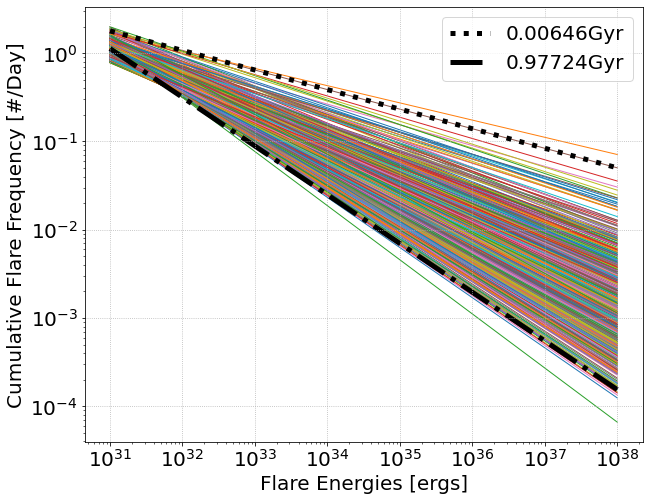

In [56]:
list_len = range(0, len(dav_test['logAge']))
plt.figure(figsize=(10, 8))
ages = dav_test['logAge']
print(10**(np.mean(ages))/10**9)

for i in list_len: 
    t_single = dav_test['logAge'][i]
    t = (10**t_single) / 10**6
    m = dav_test['Mact'][i]
    xvalues = 1000
    xdata = np.logspace(31, 38, xvalues)
    ydata, a1, b1, c1 = func(t, m, -0.07, 0.79, -1.06)
    zdata, a2, b2, c2 = func_2(t, m, 2.01, -25.15, 33.99)
    v = (ydata * np.log10(xdata)) + zdata
    plt.plot(xdata, 10**v, linewidth=1, zorder=0)
    
t_single = min(dav_test['logAge'])
t = (10**t_single) / 10**6
idx = dav_test.index[dav_test['logAge'] == t_single]
m = dav_test['Mact'][idx[0]]

xvalues = 1000
xdata = np.logspace(31, 38, xvalues)
ydata, a1, b1, c1 = func(t, m, -0.07, 0.79, -1.06)
zdata, a2, b2, c2 = func_2(t, m, 2.01, -25.15, 33.99)
v = (ydata * np.log10(xdata)) + zdata
plt.plot(xdata, 10**v, linewidth=5, color='black', linestyle=':', label=str(round(t,2)/10**3) + 'Gyr')

t_single = max(dav_test['logAge'])
t = (10**t_single) / 10**6
idx = dav_test.index[dav_test['logAge'] == t_single]
m = dav_test['Mact'][idx[0]]

xvalues = 1000
xdata = np.logspace(31, 38, xvalues)
ydata, a1, b1, c1 = func(t, m, -0.07, 0.79, -1.06)
zdata, a2, b2, c2 = func_2(t, m, 2.01, -25.15, 33.99)
v = (ydata * np.log10(xdata)) + zdata
plt.plot(xdata, 10**v, linewidth=5, color='black', linestyle='-.', zorder=1, label=str(round(t,2)/10**3) + 'Gyr')
plt.legend(fontsize=20)
plt.grid(linestyle=':')
                                                    
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Flare Energies [ergs]', fontsize=20)
plt.ylabel('Cumulative Flare Frequency [#/Day]', fontsize=20)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_recreate_davenport.png')
plt.show()

In [51]:
xdata_log = np.logspace(34, 38, 50)
xdata = xdata_log
ydata = 0
zdata = 0
N = 1e9
v = 0

In [52]:
t = (10**(dav_test['logAge'][2])) / 10**6
m = dav_test['sec_mass'][2]

ydata, a1, b1, c1 = func(t, m, -0.07, 0.79, -1.06)
zdata, a2, b2, c2 = func_2(t, m, 2.01, -25.15, 33.99)

v = (ydata * np.log10(xdata)) + zdata
v_2 = 10**v

N = int(round(max(v_2) * N))
R = ra.uniform(0, 1, N)

cum_prob = (v_2 - np.min(v_2))/np.ptp(v_2)
gen_energies = [int(xdata[np.argwhere(cum_prob == min(cum_prob[(cum_prob - r) > 0]))]) for r in R]

new_gen_energies = []
for i in gen_energies: 
    a = float(i)
    new_gen_energies.append(a)
    
aaa = v_2[0]
bbb = N / aaa

v_new = v_2 * bbb

ValueError: x and y must have same first dimension, but have shapes (1000,) and (50,)

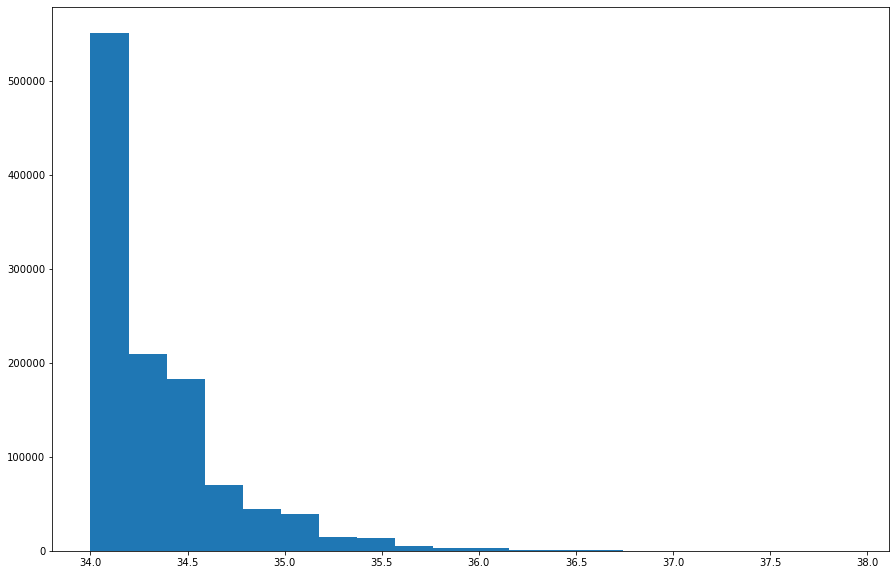

In [57]:
plt.figure(figsize=(15, 10))

plt.hist(np.log10(new_gen_energies), bins=20)
plt.plot(np.log10(xdata), v_new)

plt.yscale('log')
plt.xlabel('log(Energies) [ergs]', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_davenport_histogram.png')
plt.show()